In [1]:
from data_processing import *
from train import *

In [2]:
data = Dataset("set1_imu.csv", "set1_tab.csv")
data.data_set.head()

<class 'pandas.core.frame.DataFrame'>
merging the data sets...
calculate the quaternion representations...
calculate the rotation matrices...
calculate the navigation frame representation...
integrate the acceleration...


,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,x,...,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
0,43375070723400,733964,-0.634824,0.466391,0.584305,-0.686517,0.11501,0.06939,20.29,-125.0,...,"[[-0.11382636407015201, 0.3750248547647836, -0...",-0.290393,0.418746,0.838008,0.000000,0.000000,0.000000,-125.000000,727.000000,0.000000
1,43375082694400,733975,-0.624188,0.485592,0.616692,-0.383517,0.17861,0.16839,20.29,-125.0,...,"[[0.40367173193477623, -0.9091483282409087, 0....",-0.630255,0.604797,0.492665,-5.063563,5.629486,7.318703,-152.849595,757.962173,40.252865
2,43375093727500,733986,-0.652059,0.487532,0.576429,-0.221017,0.29831,0.27589,20.29,-125.0,...,"[[-0.3519163621500252, 0.8038031677093032, 0.4...",0.897829,0.402963,0.163287,-3.591903,11.172164,10.926440,-200.454658,850.371246,140.601148
3,43375104950600,733998,-0.622237,0.512819,0.557383,0.168683,0.37521,0.49819,20.29,-125.0,...,"[[-0.4890386249033041, -0.825427834650935, 0.2...",0.038171,0.216470,0.955260,2.024098,14.888762,17.637719,-209.861488,1006.736800,311.986101
4,43375116785300,734009,-0.613073,0.566541,0.545624,0.397183,0.34961,0.54099,20.25,-125.0,...,"[[0.07391306177843293, 0.5203295300117495, 0.8...",0.713670,0.691190,-0.086401,6.159223,19.880890,22.416440,-164.853221,1197.969884,532.283972


(array([28418.,   120.,   138.,   135.,   108.,   134.,   134.,   123.,
          113., 45747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

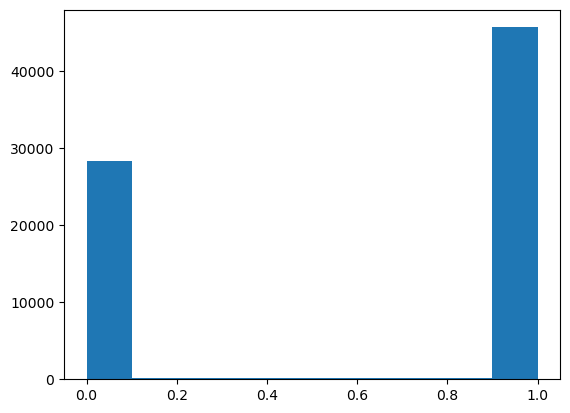

In [3]:
plt.hist(data.data_set.touch)

Split into test and trainings data...
Create segments and labels...
Create segments and labels...
The trainings data is of shape (6013, 60) and the test data is of shape (1503, 60)
Train data:
    Total: 6013
    Positive: 3734 (62.10% of total)

Test data:
    Total: 1503
    Positive: 904 (60.15% of total)

Create the LSTM model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 10, 6)             0         
                                                                 
 lstm (LSTM)                 (None, 10)                680       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
____________________________________________________

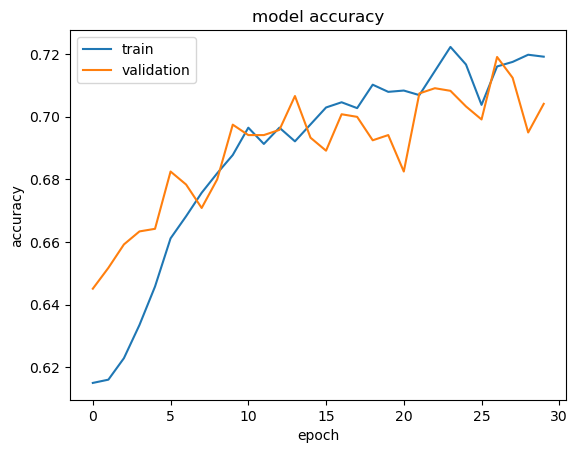

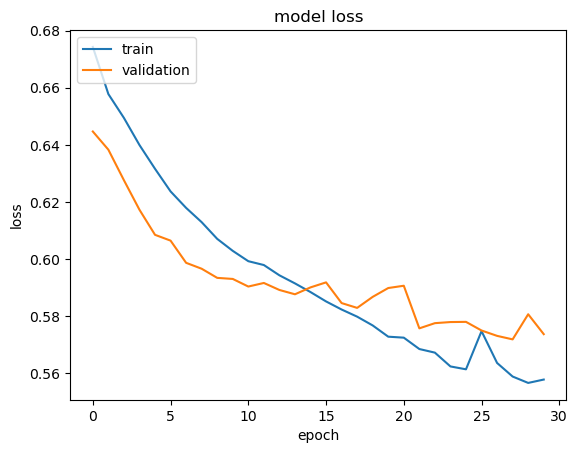

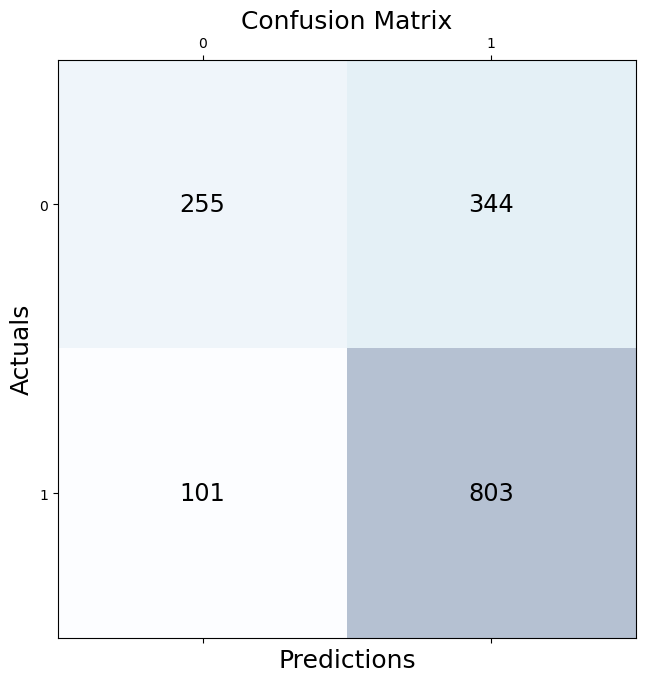

Validation accuracy: [0.6149688363075256, 0.6160083413124084, 0.6228690147399902, 0.6334719061851501, 0.6457380652427673, 0.6611226797103882, 0.6681912541389465, 0.6756756901741028, 0.6819126605987549, 0.6877338886260986, 0.6964656710624695, 0.6912682056427002, 0.6964656710624695, 0.6920998096466064, 0.6975051760673523, 0.7029106020927429, 0.7045738101005554, 0.7027027010917664, 0.7101871371269226, 0.7079002261161804, 0.7083160281181335, 0.7068607211112976, 0.7145529985427856, 0.7222453355789185, 0.7166320085525513, 0.7037422060966492, 0.7160083055496216, 0.7174636125564575, 0.7197505235671997, 0.71912682056427]


In [4]:
model = PredictionModel(data.data_set)